In [58]:
import numpy as np
import h5py
from uatu.watchers import key_func

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [60]:
fname = '/home/sean/Git/uatu/data/snd4.samples.hdf5'

In [61]:
f = h5py.File(fname, 'r')

In [62]:
len(f.keys())

50

# Cache size greater than 1 led to some values being skipped somehow... look into. 

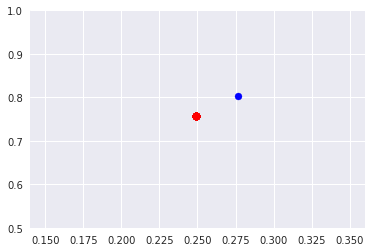

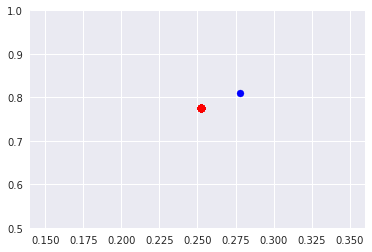

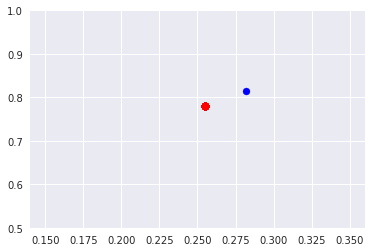

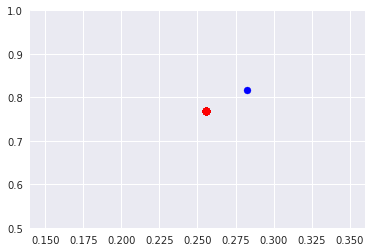

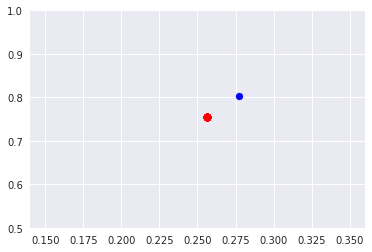

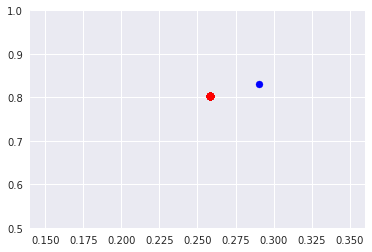

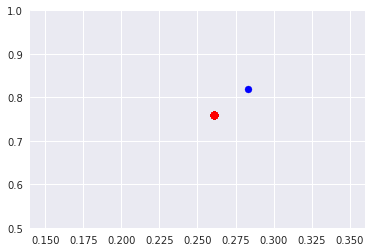

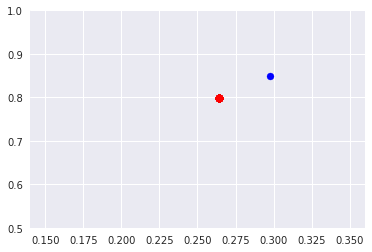

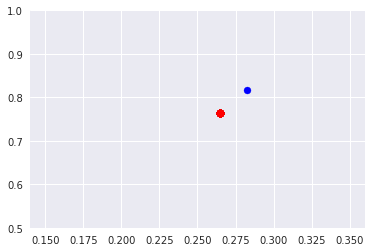

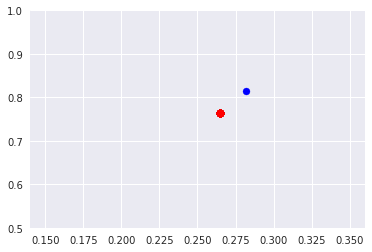

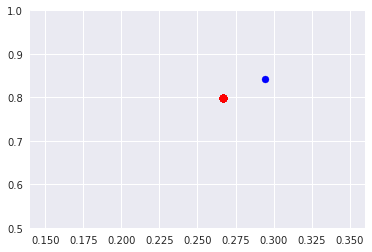

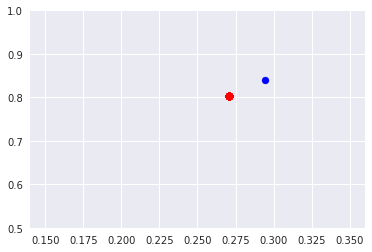

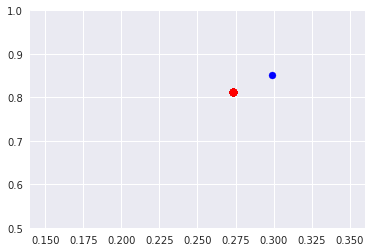

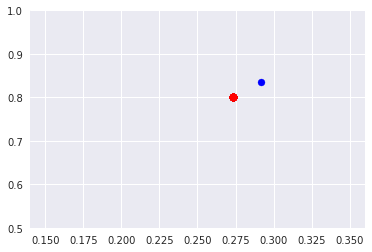

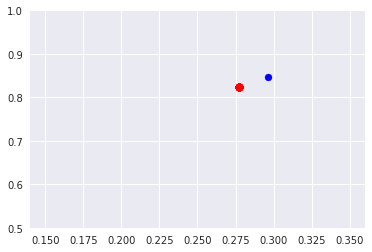

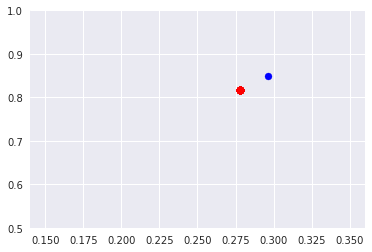

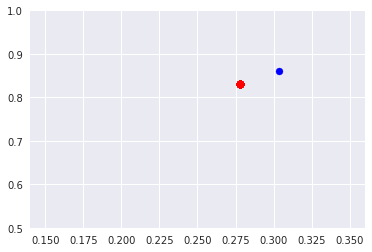

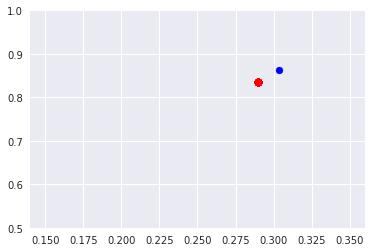

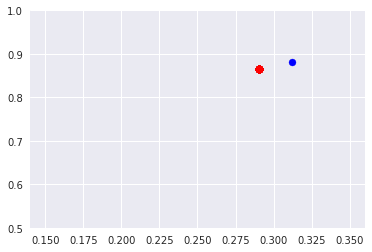

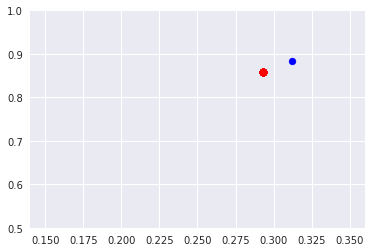

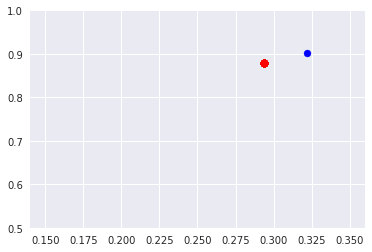

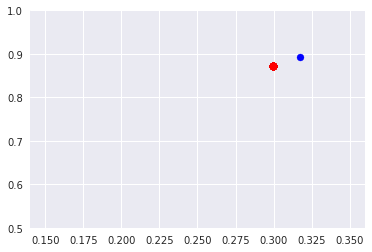

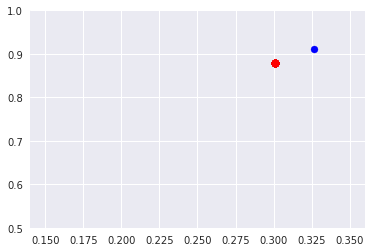

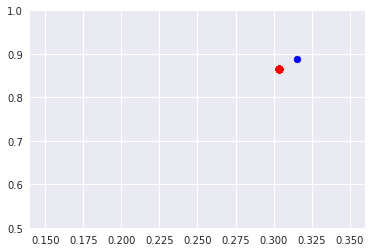

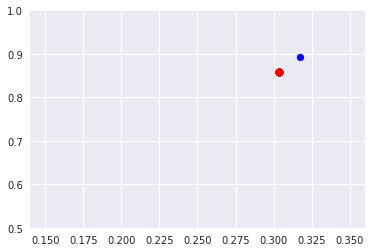

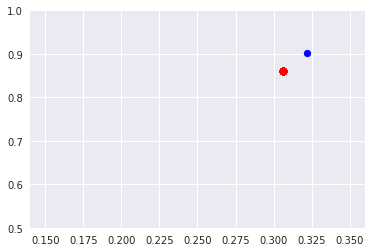

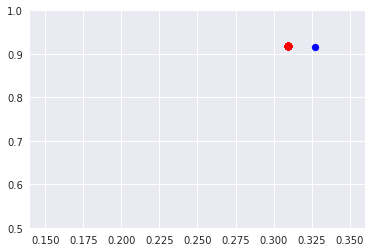

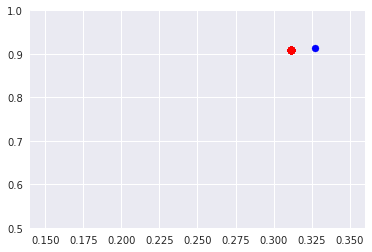

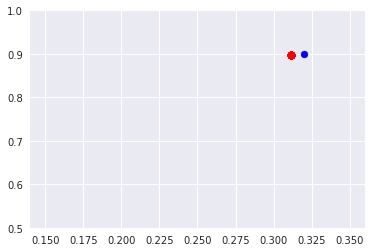

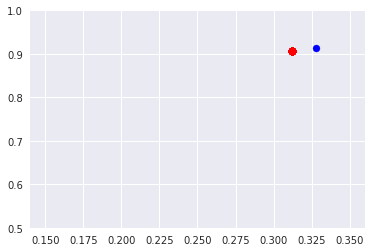

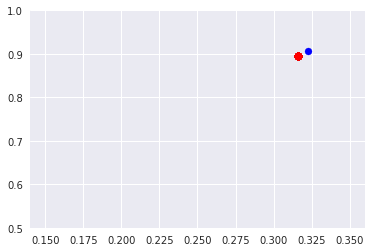

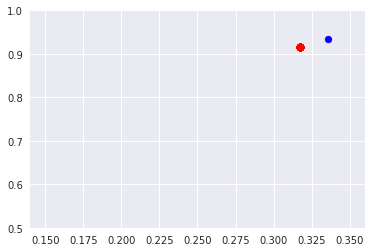

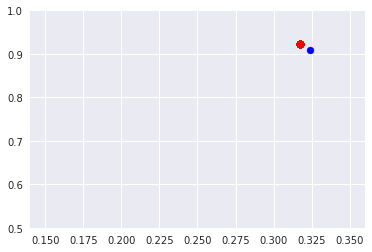

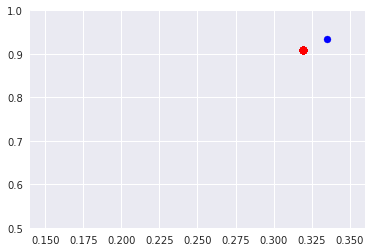

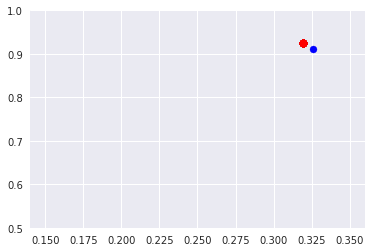

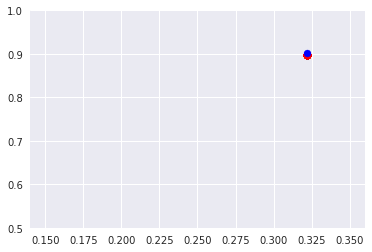

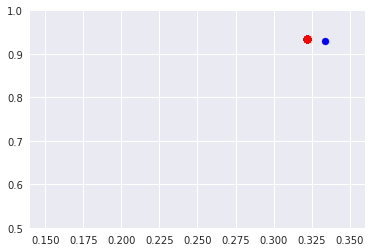

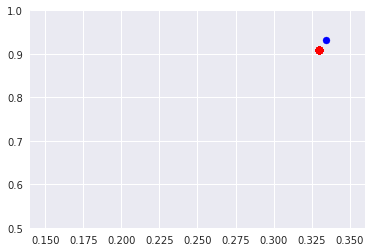

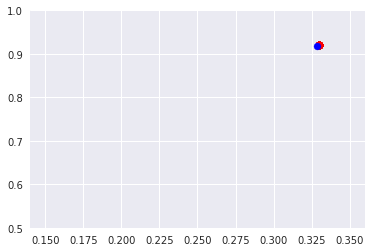

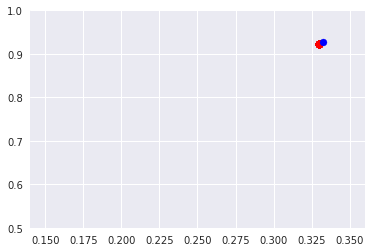

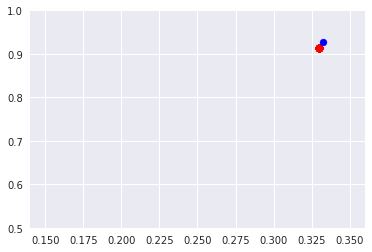

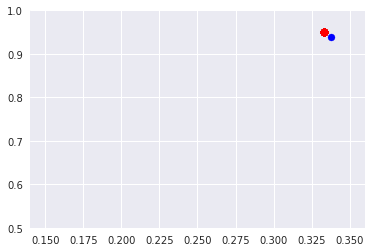

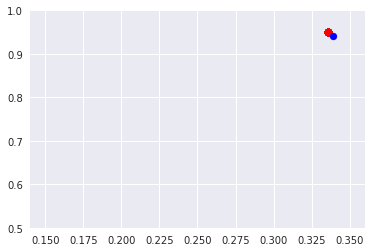

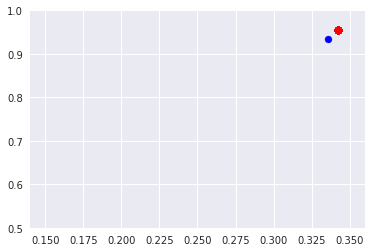

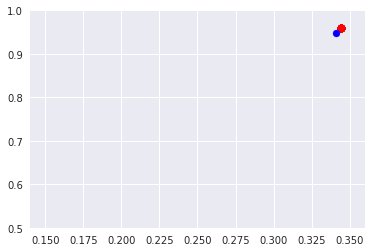

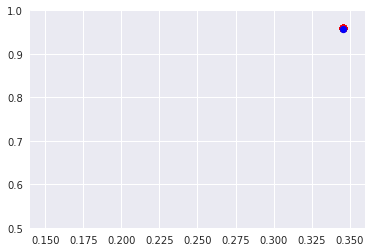

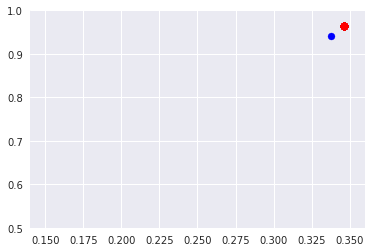

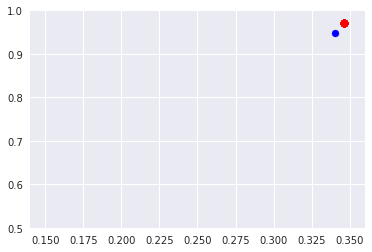

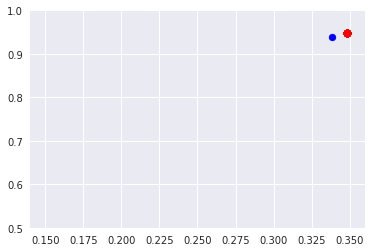

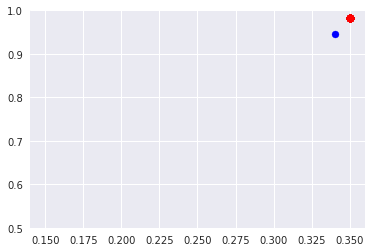

In [63]:
for true_val in f.keys():
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((81, 2))
    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value
        #pass

        plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0].mean(), preds[:,1].mean(), color = 'b', label = 'Preds')
    plt.xlim([0.14, 0.36])
    plt.ylim([0.5, 1.0])
    plt.show()

In [64]:
f.close()

In [65]:
f = h5py.File( '/home/sean/Git/uatu/data/UatuLightconeTest.hdf5', 'r')

In [66]:
unique_y_file = set()

for key in f:
    unique_y_file.add(tuple(f[key]['Y'].value[0]))

In [67]:
from uatu.watchers import *
test_dset = DatasetFromFile('/home/sean/Git/uatu/data/UatuLightconeTest.hdf5', 1, shuffle = False, augment = False, whiten = True, cache_size = 1)

In [68]:
unique_y = set()
for x_np, y_np in test_dset:
    unique_y.add(tuple(list(y_np[0])))

In [69]:
print len(unique_y)

35


In [70]:
unique_y

{(0.249085, 0.756841),
 (0.252267, 0.774377),
 (0.255518, 0.767803),
 (0.258241, 0.803323),
 (0.26093, 0.758968),
 (0.264727, 0.763957),
 (0.264745, 0.763802),
 (0.266764, 0.798965),
 (0.2706, 0.804064),
 (0.273594, 0.812422),
 (0.273602, 0.800138),
 (0.277969, 0.816847),
 (0.290273, 0.865561),
 (0.300795, 0.879204),
 (0.303877, 0.865558),
 (0.303894, 0.857957),
 (0.305991, 0.859887),
 (0.309782, 0.91847),
 (0.311153, 0.909033),
 (0.311273, 0.897717),
 (0.315974, 0.894946),
 (0.317211, 0.915982),
 (0.317239, 0.923577),
 (0.319228, 0.924126),
 (0.321677, 0.896305),
 (0.321703, 0.93463),
 (0.329572, 0.907889),
 (0.329761, 0.91927),
 (0.329828, 0.921843),
 (0.332959, 0.950872),
 (0.336049, 0.949749),
 (0.344579, 0.95967),
 (0.34641, 0.971143),
 (0.348479, 0.946874),
 (0.349955, 0.982907)}

In [71]:
len(unique_y_file)

50